# Introduction

Since the industrial revolution, Earth has experienced a human-sourced increase in greenhouse gases, contributing to a global climate change. How we generate energy is amoung the top sources for greenhouse gases so let's take a look at the recent trends of various sources of energy in the US. 

Is the US shifting to more renewable sources of energy?

In [66]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [140]:
### Load Data from Energy Information Administration
eia = pd.read_csv("EIA_energy_generation_for_all_sectors.csv")

years_of_interest = ["2001","2002","2003","2004","2005","2006","2007","2008","2009",
                     "2010","2011","2012",'2013',"2014",'2015',"2016","2017"]
eia[years_of_interest] = eia[years_of_interest].apply(pd.to_numeric)

This dataset is from the Department of [US Energy Information Administration](https://www.eia.gov/electricity/data/browser/#/topic/0?agg=2,0,1&fuel=vtvv&geo=g&sec=g&linechart=ELEC.GEN.ALL-US-99.A~ELEC.GEN.COW-US-99.A~ELEC.GEN.NG-US-99.A~ELEC.GEN.NUC-US-99.A~ELEC.GEN.HYC-US-99.A~ELEC.GEN.WND-US-99.A~ELEC.GEN.TSN-US-99.A&columnchart=ELEC.GEN.ALL-US-99.A~ELEC.GEN.COW-US-99.A~ELEC.GEN.NG-US-99.A~ELEC.GEN.NUC-US-99.A~ELEC.GEN.HYC-US-99.A~ELEC.GEN.WND-US-99.A&map=ELEC.GEN.ALL-US-99.A&freq=A&ctype=linechart&ltype=pin&rtype=s&maptype=0&rse=0&pin=). It contains the energy production data for the years 2001 through 2017 specified by sector in thousand megawatt hours and lists a source key for each sector.

The United States Energy Information Administration(EIA) is a principal agency of the U.S. Federal Statistical System responsible for collecting, analyzing, and disseminating energy information. The EIA is part of the US Department of Energy. By law, EIA’s products are prepared independently of policy considerations. EIA neither formulates nor advocates any policy conclusions.

## What is the total energy generation trend in the United States?

In order to contextualize our analysis, let us see how US energy production has changed over time. 

In [166]:
### Define sector isolating function
def isolate_data_as_array_2010_2017(data,i):
    data_temp = data.iloc[i]
    temp_list = [data_temp['2001'], data_temp['2002'], data_temp['2003'], data_temp['2004'], 
                 data_temp['2005'], data_temp['2006'], data_temp['2007'], data_temp['2008'], 
                 data_temp['2009'], data_temp['2010'], data_temp['2011'], data_temp['2012'], 
                 data_temp['2013'], data_temp['2014'], data_temp['2015'], data_temp['2016'], 
                 data_temp['2017']]
    temp_list = pd.to_numeric(temp_list)
    return temp_list

### Isolate total energy generated by entire US
total_production = isolate_data_as_array_2010_2017(data=eia, i=0)

### Define list of years for x-axis labeling 
years = pd.to_numeric(np.arange(2001,2018))

<IPython.core.display.Javascript object>


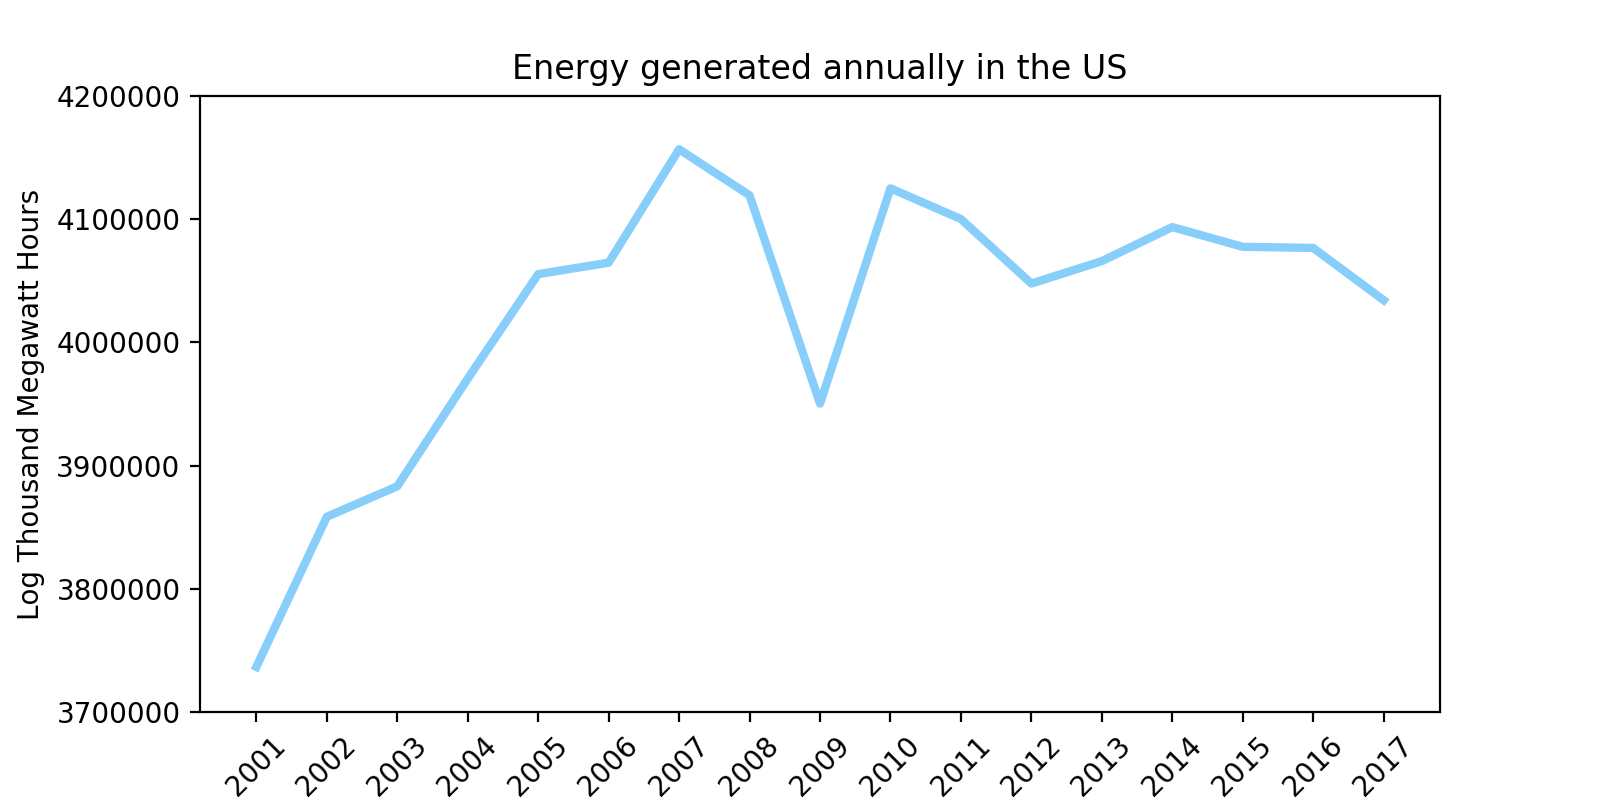

In [167]:
### Plot line graph of energy generated from 2001 to 2017
figure1 = plt.figure(figsize=(8, 4))
plt.plot(years,total_production, marker='', color="lightskyblue", linewidth=3)
plt.ylabel("Log Thousand Megawatt Hours")
plt.xlabel("Year")
plt.xticks(ticks=years, rotation=45)
plt.title("Energy generated annually in the US")
plt.ylim(bottom=3700000, top=4200000)
_ = plt.show()


Wow, we see interesting activity!  Significant growth in the first 6 years then a harsh dip in 2009. The expnential-like rise could be from the wide acceptance of electornics in the household and workplace. It's possible the dip is a result of the infamous Bank Bail-Out(Emergency Economic Stabilization Act) in October of 2008. Persons and companies alike experienced quite a financial hardship as a resulf of the housing bubble popping. Since that happened in late 2008, it makes sense we wouldn't see the affects of it till the following year. Promptly afterwards, 2010 seemed closer to pre-dip values and has largely stayed the same since but with a slight downward tail. The downward tail could resutlt from a reduction in energy use from a mindful public and companies or even from a higher adoption of residential solar panels or higher efficiency electrical equipment, some combination, or something else entirely. We'd have to continue to observe to see where this trend goes.

We've seen the trend over the 16 years of available data but let's take a closer look at the most recent year of info we have.

## What is the energy production source breakdown for 2017?

In [145]:
### Isolate appropriate energy types as dataframe
def isolate_data_as_df(data,i):
    data_temp = data.iloc[i]
    temp_df = pd.to_numeric(data_temp[years_of_interest])
    return temp_df

coal_prod = isolate_data_as_df(data=eia, i=1)
petrol_prod = isolate_data_as_df(data=eia, i=2)
nat_gas_prod = isolate_data_as_df(data=eia, i=4)
nuc_prod = isolate_data_as_df(data=eia, i=6)
hydro_prod = isolate_data_as_df(data=eia, i=7)
wind_prod = isolate_data_as_df(data=eia, i=9)
solar_prod = isolate_data_as_df(data=eia, i=10)
geo_prod = isolate_data_as_df(data=eia, i=11)
bio_prod = isolate_data_as_df(data=eia, i=12)

<IPython.core.display.Javascript object>


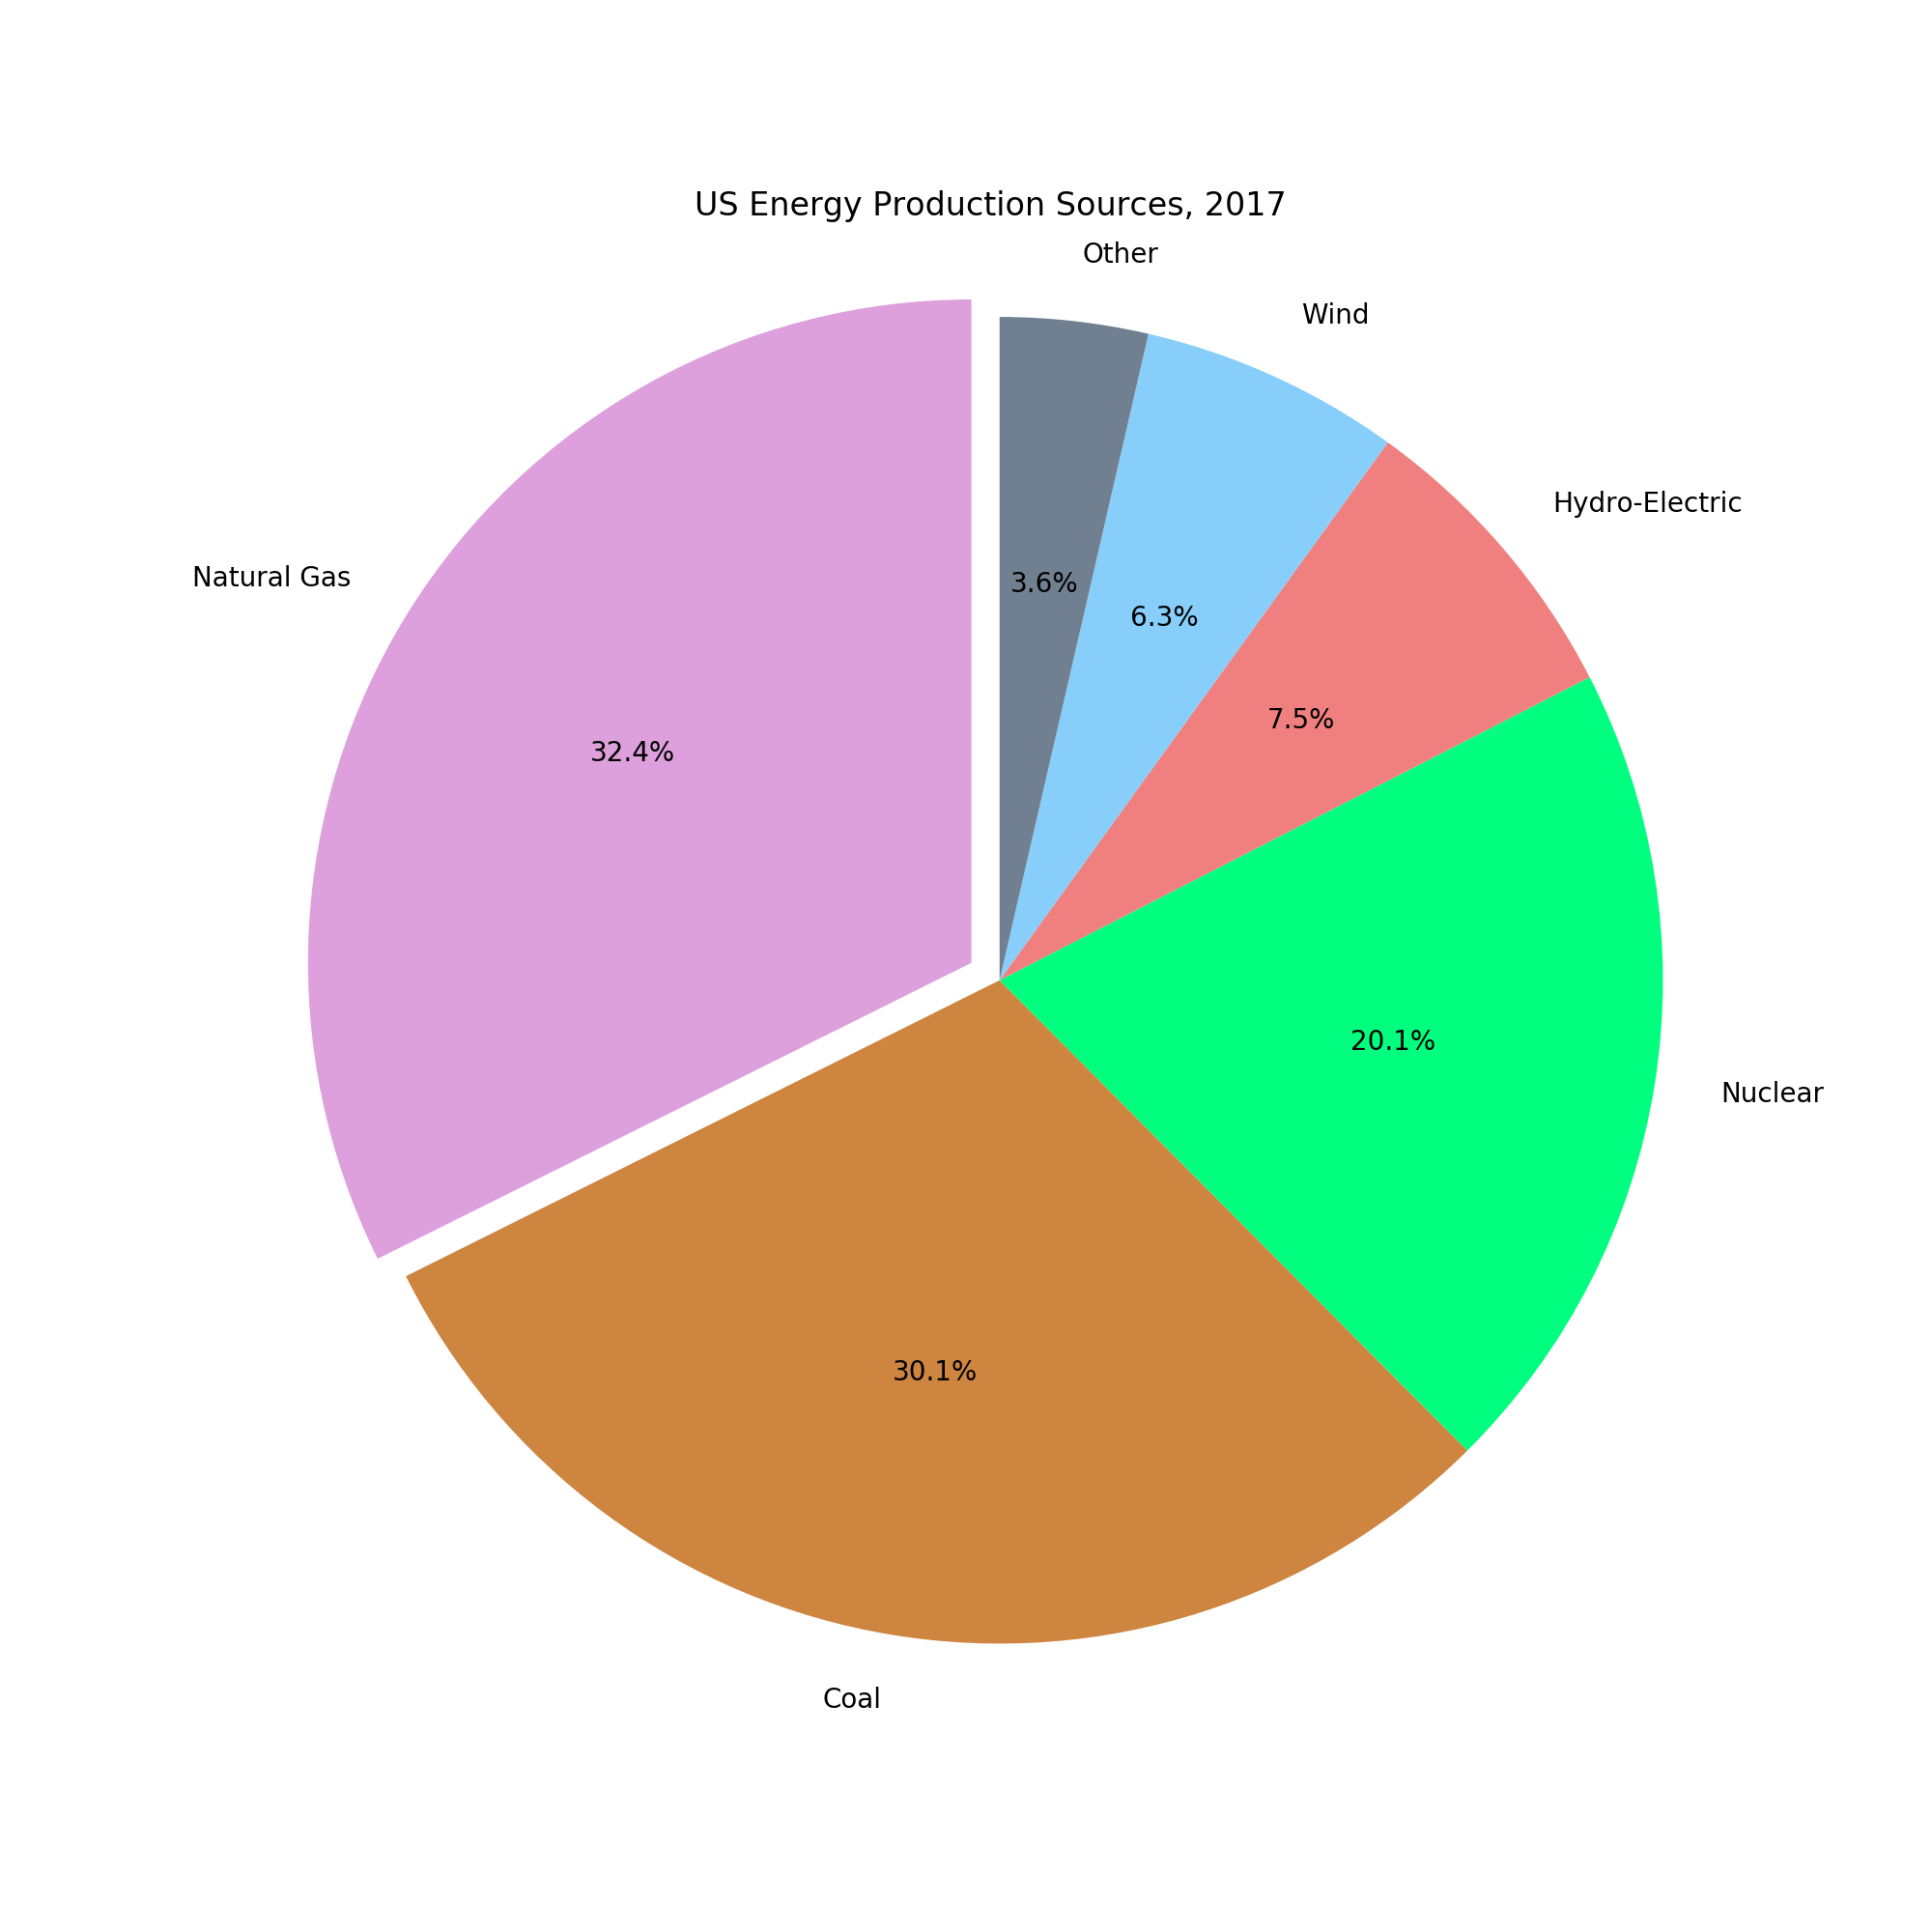

In [168]:
### Plot pie chart of 2017 energy generated by sector type
labels = ('Natural Gas', 'Coal', 'Nuclear', 'Hydro-Electric', 'Wind', 'Other')
other_2017 = sum([bio_prod['2017'] + solar_prod['2017'] + petrol_prod['2017'] + geo_prod['2017']])
pies = [nat_gas_prod['2017'], coal_prod["2017"], nuc_prod['2017'], 
         hydro_prod['2017'], wind_prod['2017'], other_2017]
colors = ['plum', 'peru', 'SpringGreen', 'lightcoral', 'lightskyblue','slategray']
explode = (0.05, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,10))
plt.pie(pies, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90) 
plt.axis('equal')
plt.title("US Energy Production Sources, 2017")
__ = plt.show()

Now we have a visual breakdown of the percent of the energy source for the US in 2017!
The top 5 energy source contibutors for 2017 are:
   1. Natural Gas (32.3%)
   2. Coal (30%)
   3. Nuclear (20%)
   4. Hydro-Electric (7.5%)
   5. Wind (6.3%)

Together, the top 5 make up 96.1%, which shows that the US has invested in only a few types of energy production with the more renewable or environmentally friendly sectors at the bottom of the top 5. 

But one may ask, has it always looked like this? or more specifically:

## What are the trends of energy generation by source type from 2001 to 2017?

In [147]:
### Isolate relevant energy sector types
coal_production = isolate_data_as_array(data=eia, i=1)
petrol_production = isolate_data_as_array(data=eia, i=2)
nat_gas_production = isolate_data_as_array(data=eia, i=4)
nuc_production = isolate_data_as_array(data=eia, i=6)
hydro_production = isolate_data_as_array(data=eia, i=7)
wind_production = isolate_data_as_array(data=eia, i=9)
solar_production = isolate_data_as_array(data=eia, i=10)
geo_production = isolate_data_as_array(data=eia, i=11)
bio_production = isolate_data_as_array(data=eia, i=12)

<IPython.core.display.Javascript object>


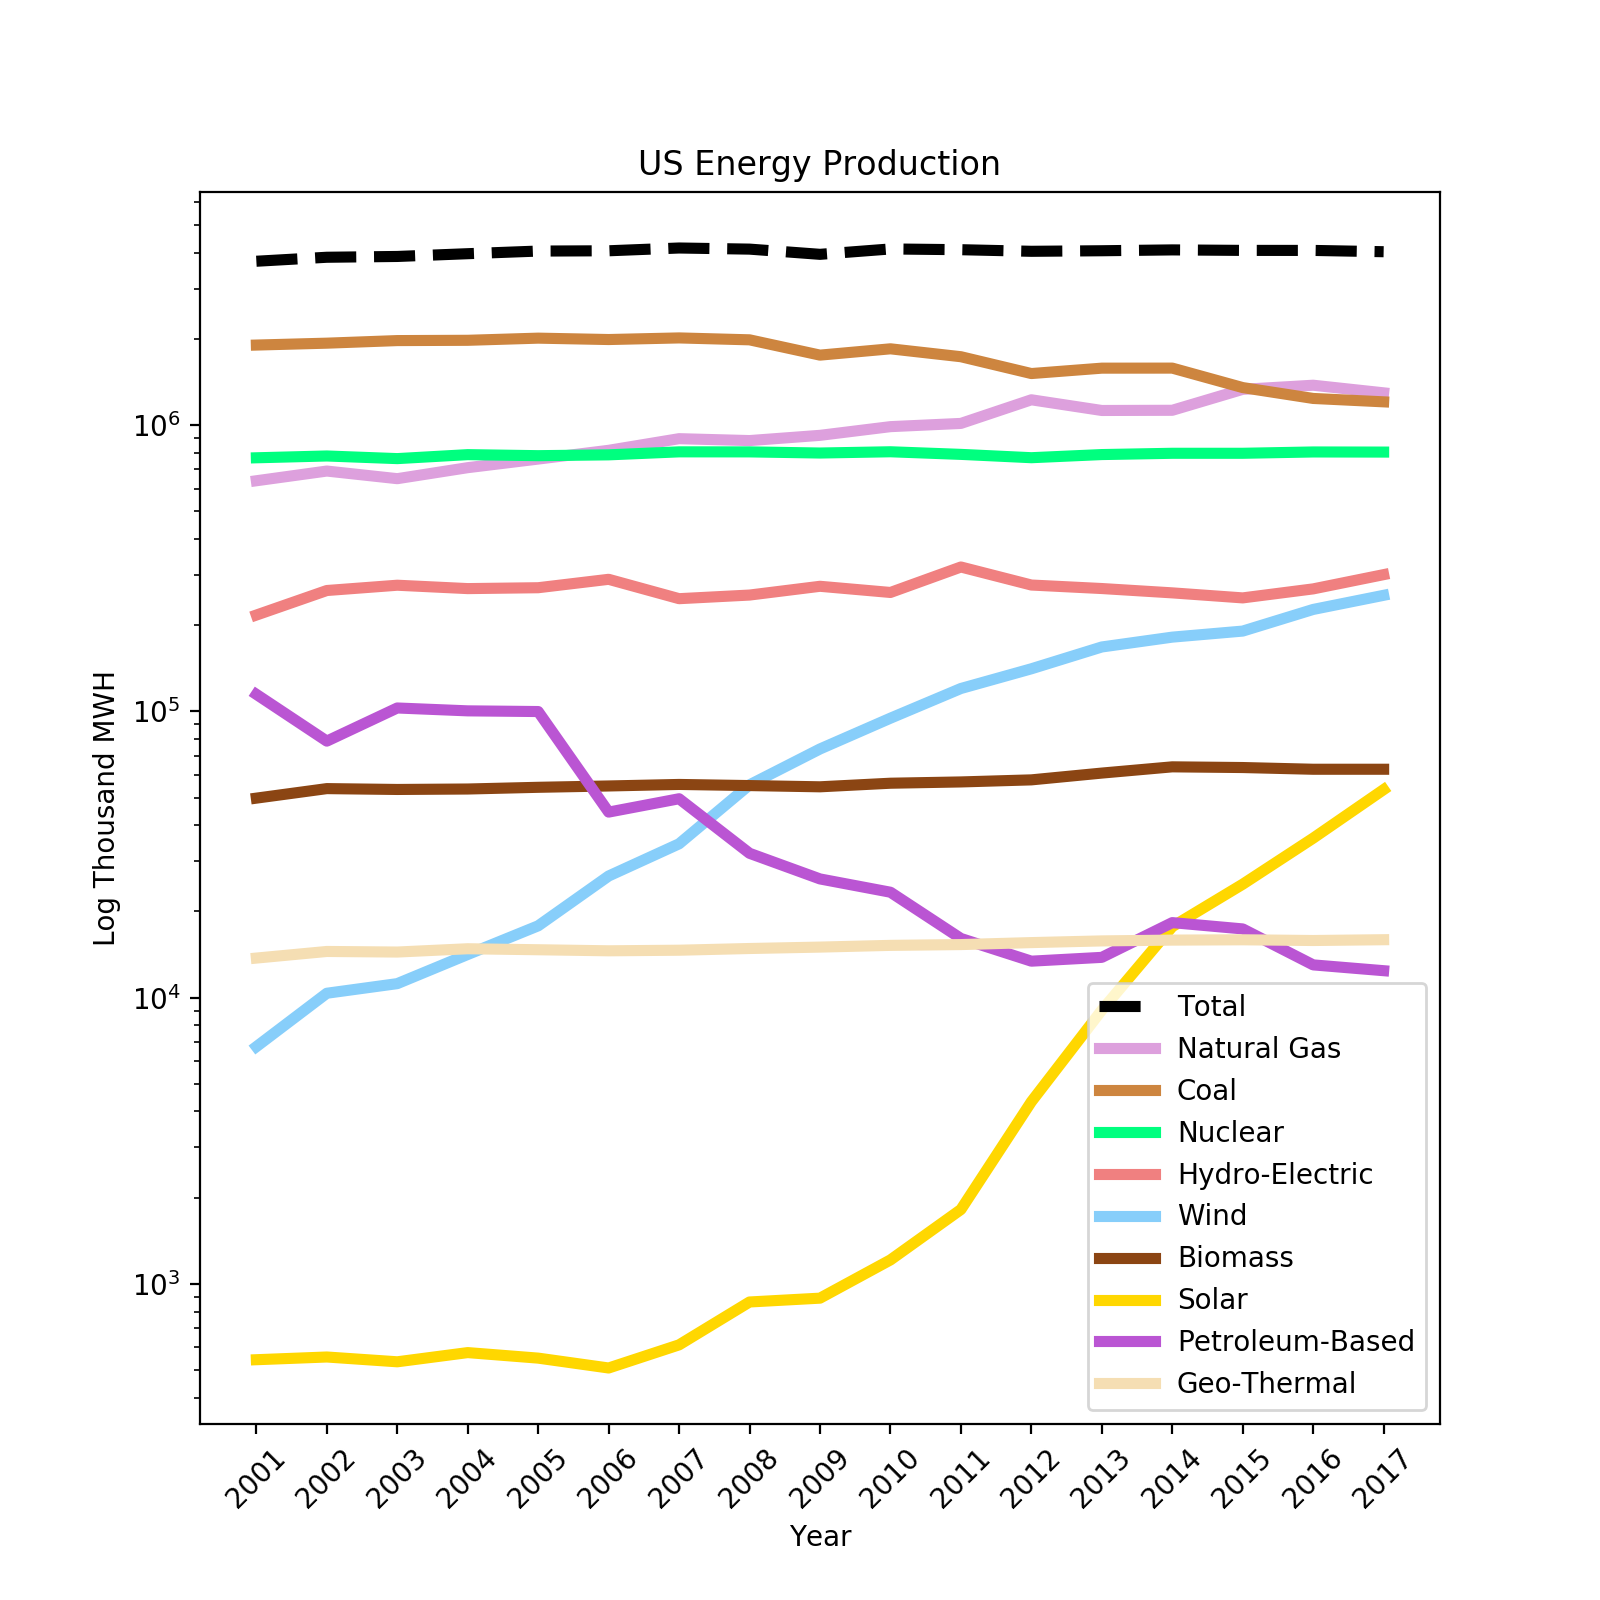

In [148]:
### Plot line plot of each energy sector from 2001 to 2017
plt.figure(figsize=(8,8))

plt.plot(years,total_production, label="Total", color='k', linewidth=4, linestyle='dashed')
plt.plot(years,nat_gas_production, label="Natural Gas", color="plum", linewidth=4)
plt.plot(years,coal_production, label="Coal", color="peru", linewidth=4)
plt.plot(years,nuc_production, label="Nuclear", color="SpringGreen", linewidth=4)
plt.plot(years,hydro_production, label="Hydro-Electric", color="lightcoral", linewidth=4)
plt.plot(years,wind_production, label="Wind", color="lightskyblue", linewidth=4)
plt.plot(years,bio_production, label="Biomass",color="SaddleBrown", linewidth=4)
plt.plot(years,solar_production, label="Solar", color="Gold", linewidth=4)
plt.plot(years,petrol_production, label="Petroleum-Based", color="mediumorchid", linewidth=4)
plt.plot(years,geo_production, label="Geo-Thermal", color="wheat", linewidth=4)

plt.xlabel("Year")
plt.ylabel("Log Thousand MWH")
plt.yscale("log")
plt.xticks(ticks=years,rotation=45)
plt.title("US Energy Production")
plt.legend()
___ = plt.show()

Great, we can see that coal energy production is on the decline, likely due in part to the accurate public perception of coal as a dirty energy source. It is known to be non-renewable and it's main byproduct carbon dioxide is largest contributor to the greenhouse effect due to its sheer volume. Coal energy production currently rund around 33% with opportunity to get up to 40%. [CoalSource](https://www.worldcoal.org/reducing-co2-emissions/high-efficiency-low-emission-coal)

Energy production from natural Gas(methane) is on the rise, possibly due to the negative public perception of coal, but is nonetheless a green house gas, and actually has 25 times the global warming potential than carbon dioxide; it just isn't as volumous so it hasn't gotten the negative spotlight just yet.The American Gas Association claims a 90% efficiency for methane and notes this as 3 times the energy efficiency than electrical power efficiency.[NatGasSource1](http://climatechange.lta.org/get-started/learn/co2-methane-greenhouse-effect/),[NatGas Source2](https://www.aga.org/policy/environment/energy-efficiency-natural-gas-utilities/)

Nuclear energy production has largely remained the same over the 16 year period. Depsite accounting for roughly 20% of the energy production of the united states, one of it's biggest obstables remains: "Not in my backyard" mentality. More nuclear facilties are planned to come online after 2020. [Source](http://www.world-nuclear.org/information-library/country-profiles/countries-t-z/usa-nuclear-power.aspx)

Wind and Solar energy production have done quite well, both of which have a lower efficiency(45% and 22% respectively) than other energy production methods but have the benefits of being renewable and having little to no environmental impact. [SolarSource](https://news.energysage.com/best-solar-panels-complete-ranking/). [WindSource](https://greenliving.lovetoknow.com/Efficiency_of_Wind_Energy)


## A Comparison to available Census data

In [127]:
### Importing Census Energy Data
energy = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")

x = (1000000000)/(3412141.6331279)
energy[["TotalP2010","TotalP2011","TotalP2012","TotalP2013","TotalP2014"]] *= x

I was able to locate a dataset for [United States Energy, Census, and GDP](https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14/home). The user who provided the dataset claims he uses the EIA dataset as a source for some of the data within this dataset so we should expect agreement when compared. 

I've elected to change the units of the relevant fields of energy from billion British Thermal Units(One BTU is equal to the amount of energy used to raise the temperature of one pound of water one degree Fahrenheit) to thousand megawatt hours(A megawatt hour (Mwh) is equal to 1,000 Kilowatt hours (Kwh). It is equal to 1,000 kilowatts of electricity used continuously for one hour.) beacuse it is a more commonly understood unit of measure nowadays and easily comparable to the EIA dataset.

<IPython.core.display.Javascript object>


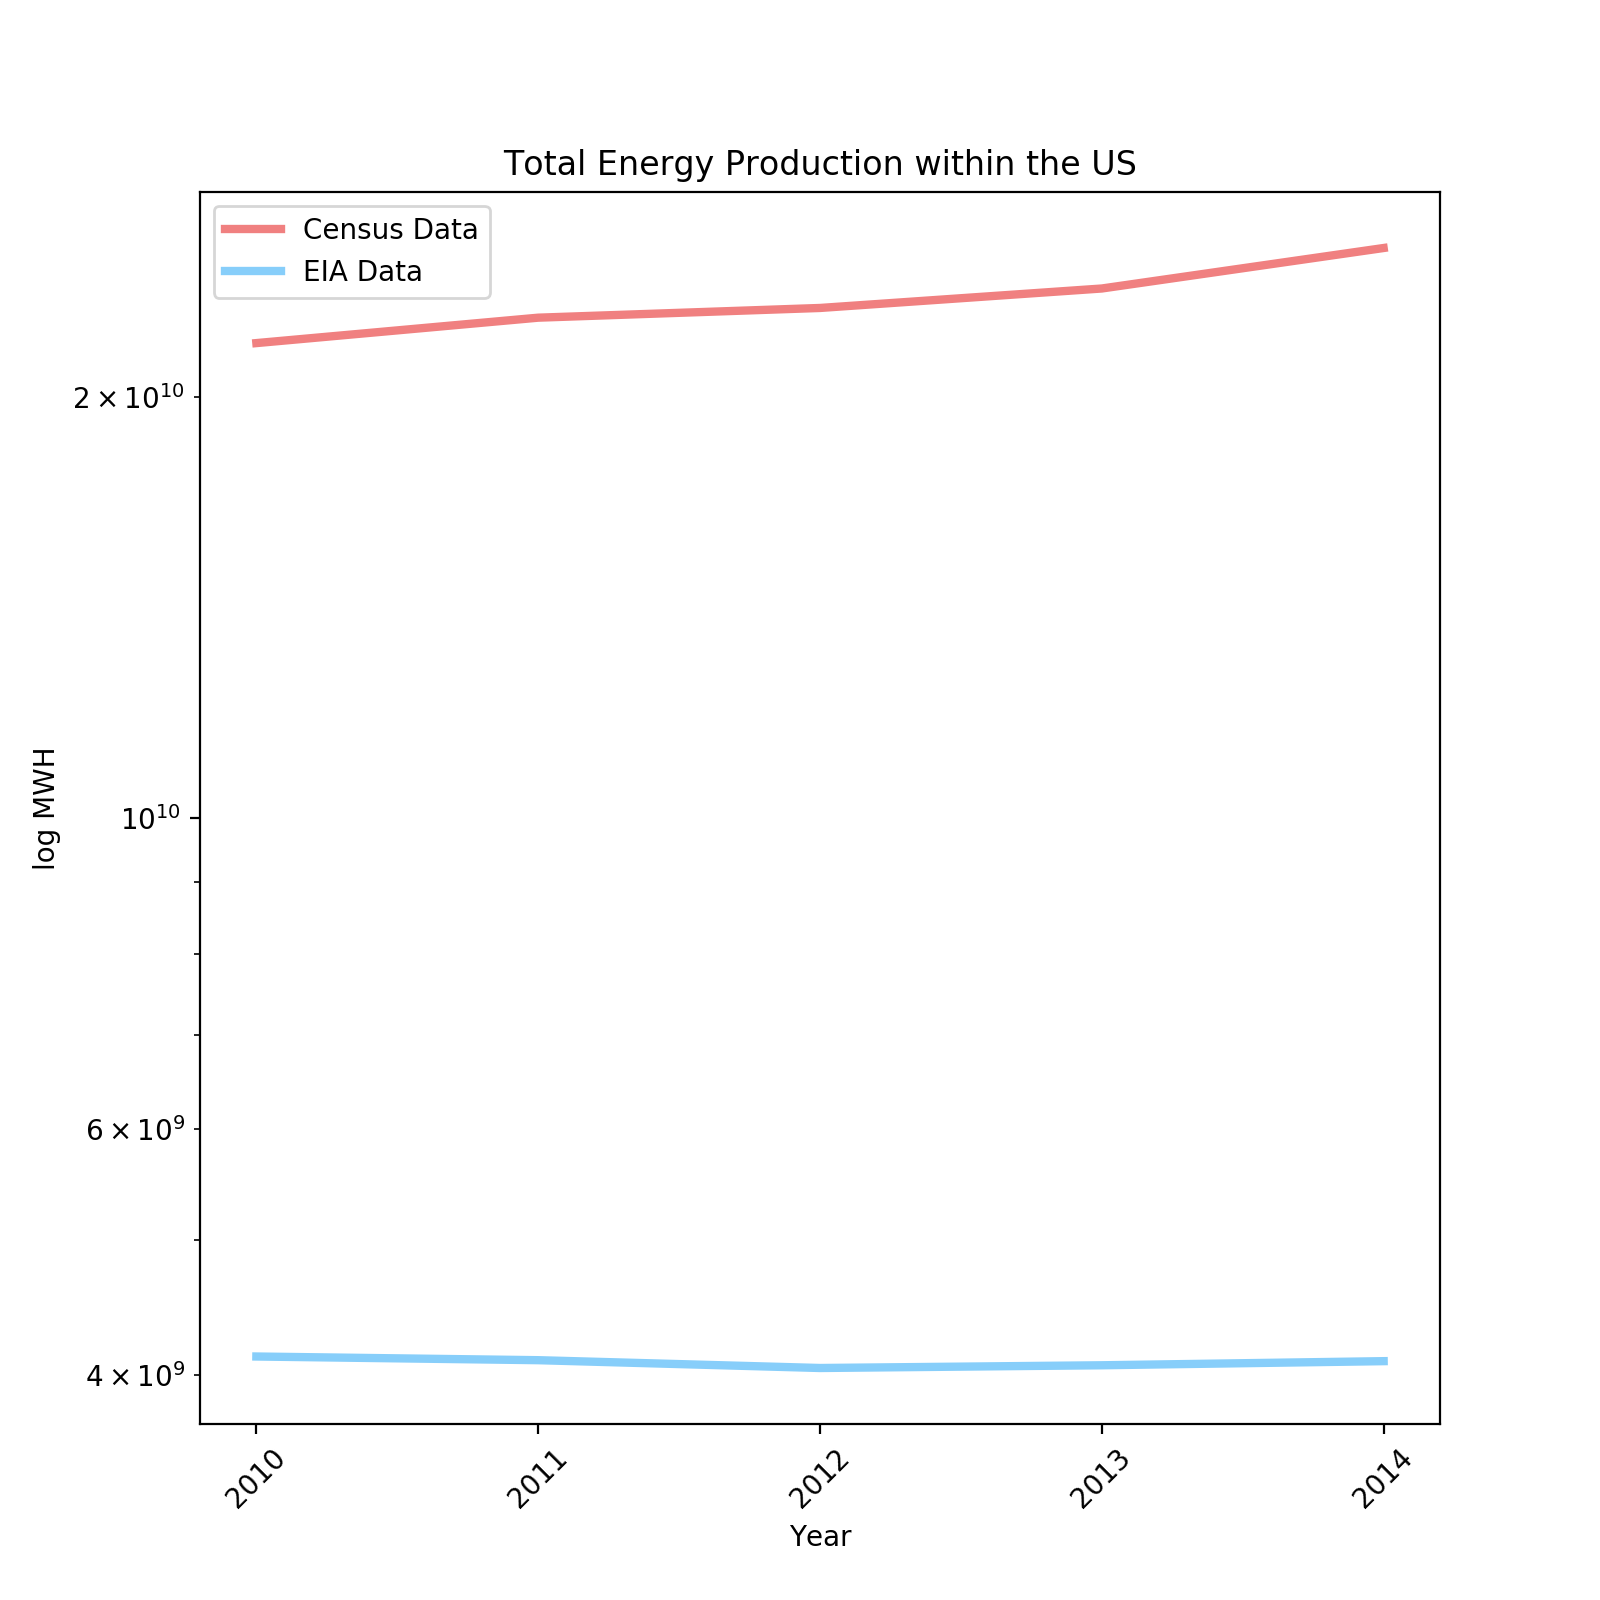

<IPython.core.display.Javascript object>


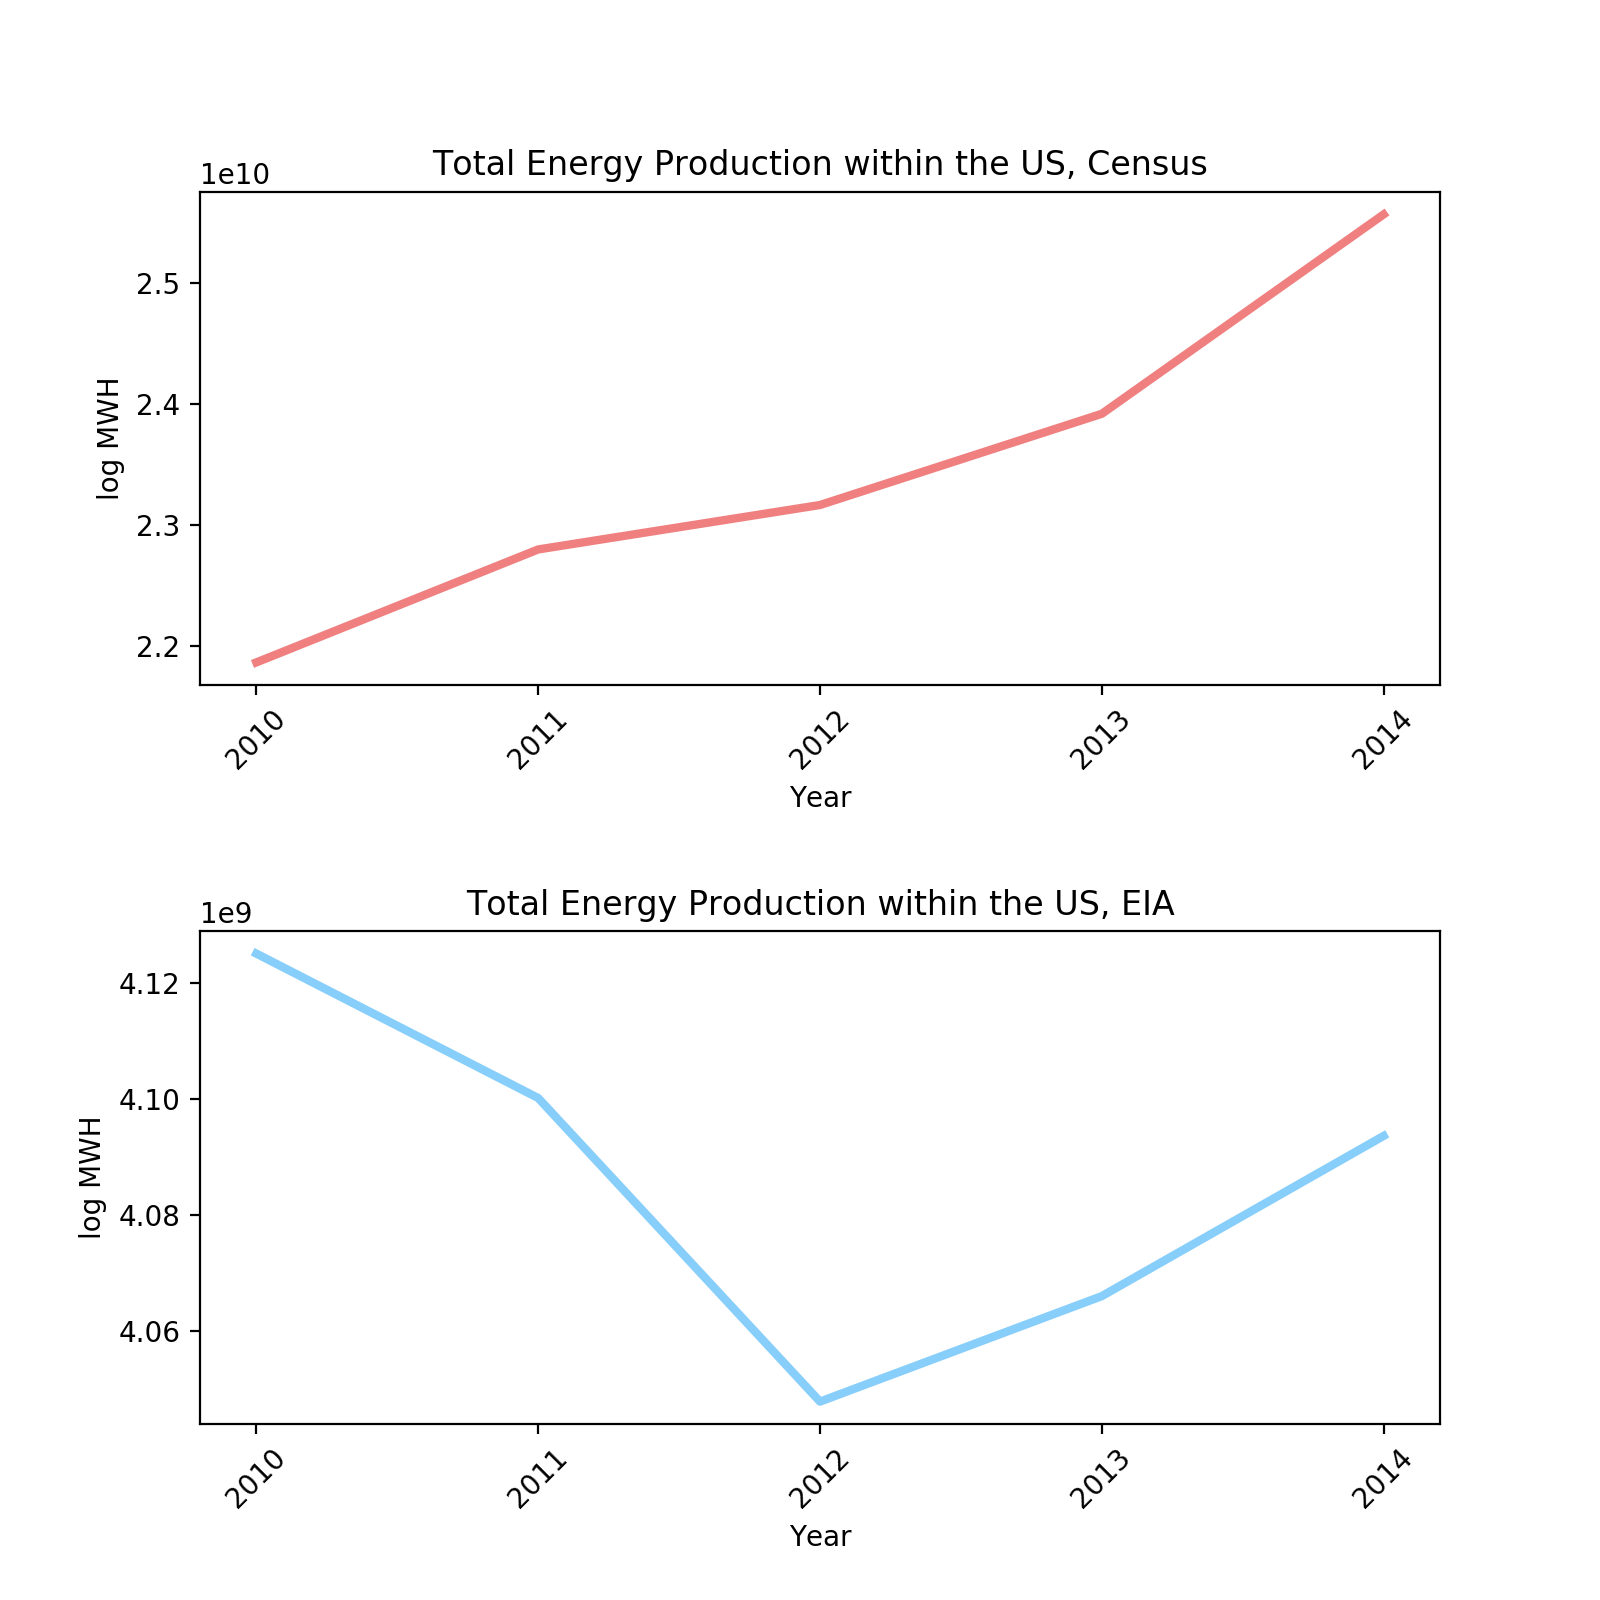

In [163]:
### US Census Energy Produced plot 2010-2014

def isolate_data_as_array_2010_2014(data,i):
    data_temp = data.iloc[i]
    temp_list = [data_temp['2010'], data_temp['2011'], 
                 data_temp['2012'], data_temp['2013'], data_temp['2014']]
    temp_list = pd.to_numeric(temp_list)
    return temp_list

total_production2 = isolate_data_as_array_2010_2014(data=eia, i=0)

energy_us = energy[energy["StateCodes"] == "US"] 
tot_prod = [energy_us.iloc[0]["TotalP2010"], energy_us.iloc[0]["TotalP2011"], 
            energy_us.iloc[0]["TotalP2012"], energy_us.iloc[0]["TotalP2013"], 
            energy_us.iloc[0]["TotalP2014"]]
X = ['2010','2011','2012','2013','2014']


plt.figure(figsize=(8,8))
plt.plot(X,tot_prod, marker='', color = "lightcoral", linewidth=3, label = 'Census Data')
plt.plot(X,total_production2*1000, marker='', color="lightskyblue", linewidth=3, label = 'EIA Data')
plt.xlabel("Year")
plt.ylabel("log MWH")
plt.xticks(ticks=indices,rotation=45)
plt.yscale("log")
#plt.ylim(bottom=19500000, top=26500000)
plt.title("Total Energy Production within the US")
plt.legend()



plt.figure(figsize=(8,8))

ax1 = plt.subplot(211)
plt.plot(X,tot_prod, marker='', color = "lightcoral", linewidth=3, label = 'Census Data')
plt.xlabel("Year")
plt.ylabel("log MWH")
plt.xticks(ticks=indices,rotation=45)
plt.title("Total Energy Production within the US, Census")

ax2 = plt.subplot(212)
plt.plot(X,total_production2*1000, marker='', color="lightskyblue", linewidth=3, label = 'EIA Data')
plt.xlabel("Year")
plt.ylabel("log MWH")
plt.xticks(ticks=indices,rotation=45)
plt.title("Total Energy Production within the US, EIA")

plt.subplots_adjust(hspace=0.5, wspace=0.5)

_____ = plt.show()

We observe that the energy produced from 2010 and 2014 between the two datasets  is off by a factor of 10 despite the fact that the Census dataset is based off the information from the EIA. There is some discrepancy between how the data was analyzed. Its bizarre that the Census data converted the EIA data from thousand MWH to billion BTU since the BTU is more difficult to understand, especailly on a billion scale. 

Looking at the separate graphs for each data set, we can see that the data don't agree on the trend of the total US energy production which is especially peculiar since they're based on the same source data. Census data shows growth while EIA data shows a decline.

We could further compare these data by normalizing each of the sets of data using (value - min_value)/(sum of each(value - min_value)), plotting and comparing their slopes to see how they truly compare but there's clearly something fishy going on here and I don't know that normalizing would yield any meaningful insights.

# Further Research

There's a lot of information that we've uncovered here but what would certainly go a long way would be a regression model with a specified confidence limit to predict how the overall trend of energy production will go and for each of the renewable and harmful sectors

Beyond these datasets, it'd be worth comparing to other countries to contextualize how US energy production is changing. Is the United States leading the world in renewable energy adoption?